# Import necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [2]:
data = pd.read_csv('sales_data.csv')
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Convert 'Date' column to datetime format

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0        2013-11-26
1        2015-11-26
2        2014-03-23
3        2016-03-23
4        2014-05-15
            ...    
113031   2016-04-12
113032   2014-04-02
113033   2016-04-02
113034   2014-03-04
113035   2016-03-04
Name: Date, Length: 113036, dtype: datetime64[ns]

# Extract year, month, and day from the 'Date' column

In [4]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop irrelevant columns (if any)

In [5]:
data.drop(columns=['Date', 'Product', 'Cost', 'Revenue'], inplace=True)
data.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit
0,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,8,45,120,590
1,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,8,45,120,590
2,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,23,45,120,1366
3,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,20,45,120,1188
4,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,4,45,120,238


# Handle categorical variables

In [6]:
label_encoders = {}
for column in ['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit
0,26,11,2013,19,3,1,1,5,0,0,8,45,120,590
1,26,11,2015,19,3,1,1,5,0,0,8,45,120,590
2,23,3,2014,49,0,1,0,26,0,0,23,45,120,1366
3,23,3,2016,49,0,1,0,26,0,0,20,45,120,1188
4,15,5,2014,47,0,0,0,26,0,0,4,45,120,238


# Extract features and target variable

In [7]:
X = data.drop(columns=['Order_Quantity'])
y = data['Order_Quantity']

# Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest regressor model

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions on the test set

In [10]:
predictions = model.predict(X_test)
predictions

array([15.99, 25.  , 12.  , ...,  6.12,  1.76,  9.01])

# Evaluate the model

In [11]:
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.15182612522772262


# Visualizations

# Histogram of Order_Quantity

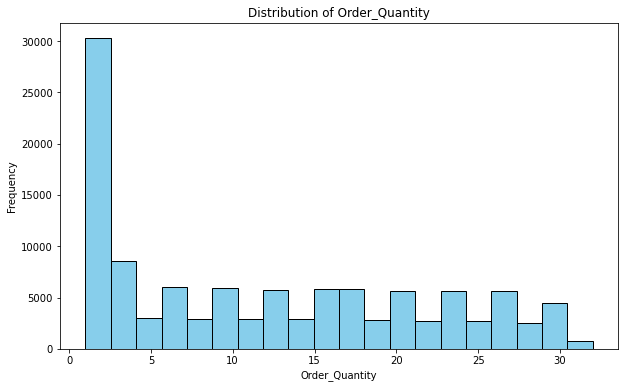

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['Order_Quantity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Order_Quantity')
plt.xlabel('Order_Quantity')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Order_Quantity vs. Unit_Cost

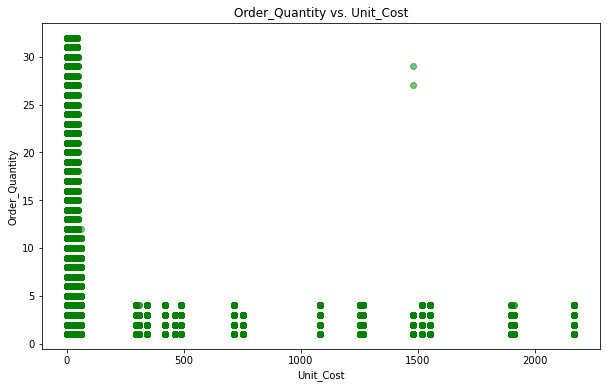

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Unit_Cost'], data['Order_Quantity'], alpha=0.5, color='green')
plt.title('Order_Quantity vs. Unit_Cost')
plt.xlabel('Unit_Cost')
plt.ylabel('Order_Quantity')
plt.show()

# Plot actual vs. predicted for Random Forest model

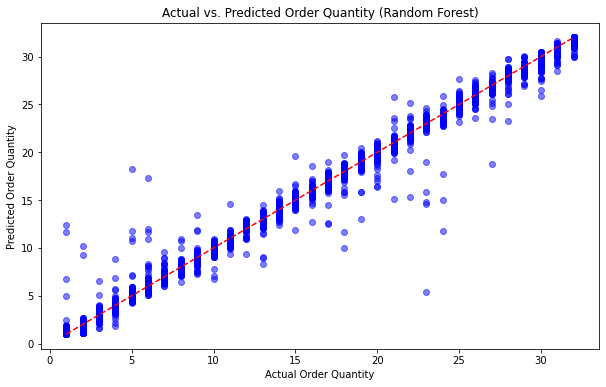

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Order Quantity (Random Forest)')
plt.xlabel('Actual Order Quantity')
plt.ylabel('Predicted Order Quantity')
plt.show()

# Time series plot with rolling mean

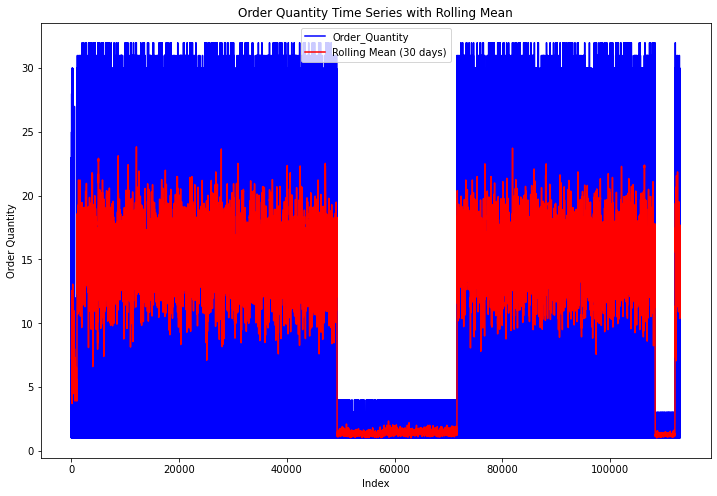

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Order_Quantity'], label='Order_Quantity', color='blue')
plt.plot(data.index, data['Order_Quantity'].rolling(window=30).mean(), label='Rolling Mean (30 days)', color='red')
plt.title('Order Quantity Time Series with Rolling Mean')
plt.xlabel('Index')
plt.ylabel('Order Quantity')
plt.legend()
plt.show()